In [9]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from PIL import Image
import torch

import cv2


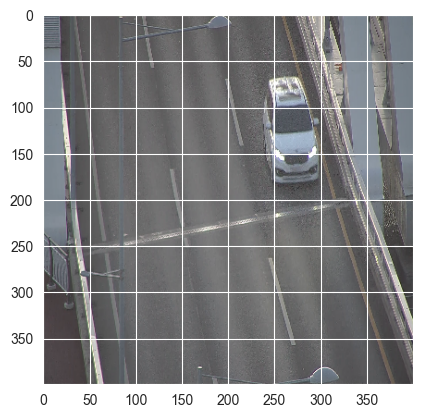

In [8]:
# 전처리를 정의합니다.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((400, 400)),
])

# ImageFolder를 사용하여 예측 데이터셋을 불러옵니다.
# 예측할 이미지가 모두 한 폴더에 있는 경우입니다.
pred_dataset = datasets.ImageFolder(root='./test_data', transform=transform) #
dataset_image = pred_dataset[0][0]


# DataLoader를 사용하여 배치 처리 등을 수행할 수 있습니다.
to_pil = transforms.ToPILImage()
img_pil_transformed = to_pil(dataset_image)
plt.imshow(img_pil_transformed)

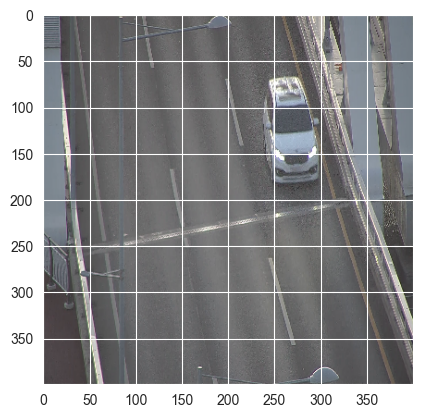

In [6]:
# OpenCV로 이미지 불러오기
img = cv2.imread("./test_data/dummy/064442001.png", cv2.IMREAD_COLOR)

# OpenCV는 BGR 순서로 이미지를 불러오므로, 이를 RGB로 변경합니다.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# numpy ndarray를 PIL Image로 변환
img_pil = Image.fromarray(img)

# 전처리 정의
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((400, 400)),
])

# 전처리 적용
img_tensor = transform(img_pil)

# ToPILImage 변환을 사용하여 텐서를 PIL 이미지로 변환
# imshow에 적합한 형태로 만들기 위함입니다.
to_pil = transforms.ToPILImage()
img_pil_transformed = to_pil(img_tensor)

# 이미지를 보여줍니다.
plt.imshow(img_pil_transformed)
plt.show()


In [10]:
# dataset_image -> 테스트 PIL으로 읽은 데이터
# img_tensor -> 테스트 cv2로 읽고 PIL로 변환한 데이터
print(torch.all(torch.eq(dataset_image, img_tensor)))

# 동일하다!

tensor(True)
